1. For a given set of training data examples stored in a .CSV file, implement and demonstrate the Find-S algorithm to output a description of the set of all hypotheses consistent with the training examples.

https://github.com/misbahulard/Machine-Learning/blob/master/enjoysport.csv

In [6]:
import pandas as pd

data = pd.read_csv("enjoysport.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

def find_s(X, y):
    specific_h = None
    for i in range(len(y)):
        if y[i] == "yes":
            if specific_h is None:
                specific_h = X[i].copy()
            else:
                specific_h = [
                    h if h == x else '?' for h, x in zip(specific_h, X[i])
                ]
    return specific_h

print("Most Specific Hypothesis:", find_s(X, y))

Most Specific Hypothesis: ['sunny', 'warm', '?', 'strong', '?', '?']


2. For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples




In [3]:
import pandas as pd

data = pd.read_csv('enjoysport.csv')

def candidate_elimination(data):
    specific_h = ['0'] * (data.shape[1] - 1)
    general_h = [['?'] * (data.shape[1] - 1)]

    for _, row in data.iterrows():
        if row['enjoy_sport'] == 'yes':
            for i in range(len(specific_h)):
                if specific_h[i] == '0':
                    specific_h[i] = row[i]
                elif specific_h[i] != row[i]:
                    specific_h[i] = '?'
            general_h = [g for g in general_h if all(g[j] == '?' or g[j] == row[j] for j in range(len(row) - 1))]
        else:
            new_general_h = []
            for g in general_h:
                for i in range(len(g)):
                    if g[i] == '?':
                        new_general_h.extend(g[:i] + [value] + g[i + 1:] for value in set(data.iloc[:, i]) - {row[i]})
                    elif g[i] != row[i]:
                        break
                else:
                    new_general_h.append(g)
            general_h = new_general_h

    return specific_h, general_h

specific, general = candidate_elimination(data)
print("Specific Hypothesis:", specific)
print("General Hypotheses:", general)

Specific Hypothesis: ['sunny', 'warm', '?', 'strong', '?', '?']
General Hypotheses: [['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?', '?'], ['?', '?', '?', '?', 'cool', '?'], ['?', '?', '?', '?', '?', '?']]


<ipython-input-3-41eea592d35c>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  specific_h[i] = row[i]
<ipython-input-3-41eea592d35c>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif specific_h[i] != row[i]:
<ipython-input-3-41eea592d35c>:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_general_h.extend(g[:i] + [value] + g[i + 1:] for value in set(data.iloc[:, i]) - {row[i]})
<ipython-input-3-41eea592d35c>:16: FutureWarn

3.	Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

--2025-01-15 16:49:40--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.001s  

2025-01-15 16:49:41 (16.0 MB/s) - ‘diabetes.csv’ saved [23873/23873]

Accuracy: 0.7662337662337663
Prediction for new sample: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


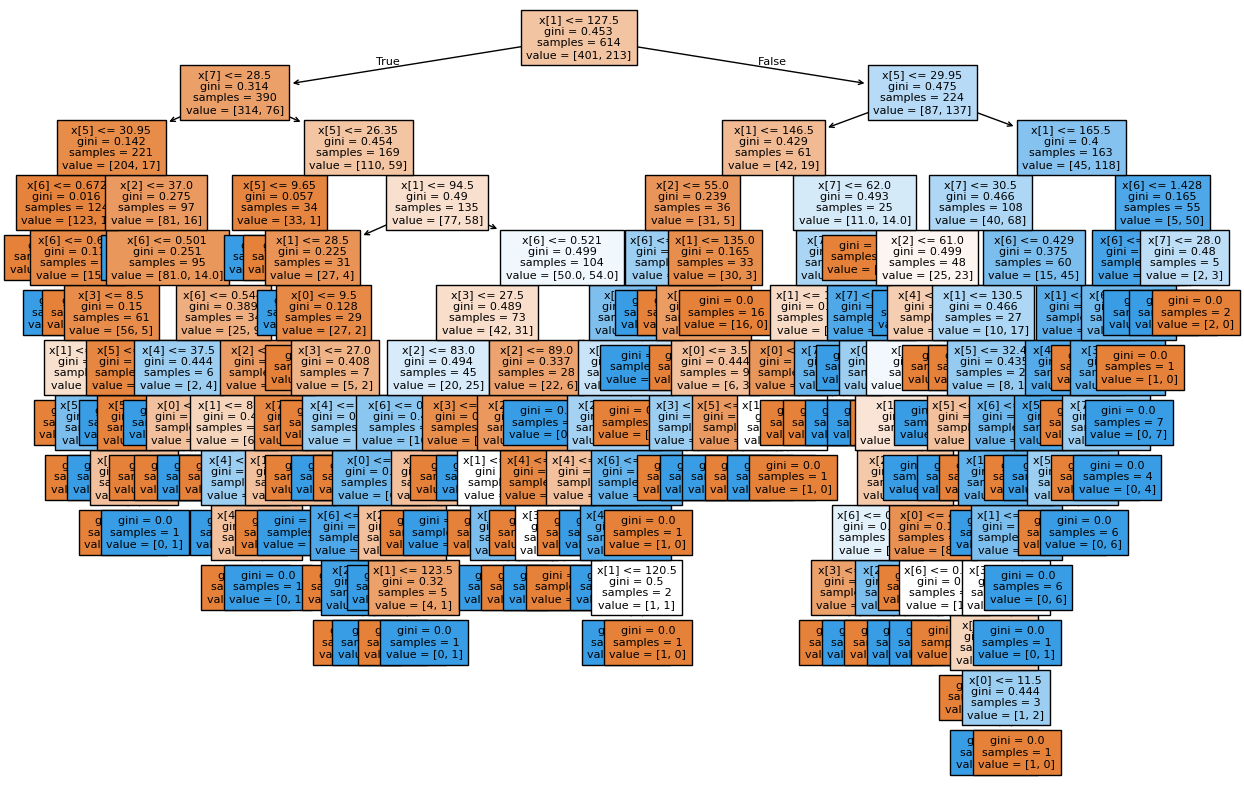

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv

data = pd.read_csv('diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

new_sample = [[6,148,72,35,0,33.6,0.627,50]]
prediction = clf.predict(new_sample)
print(f"Prediction for new sample: {prediction}")

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,fontsize=8)
plt.show()

4.	Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [11]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

input_size = 4
hidden_size = 10
output_size = 3
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
epochs = 1000
learning_rate = 0.01

for i in range(epochs):
  z1 = np.dot(X_train, W1) + b1
  a1 = sigmoid(z1)
  z2 = np.dot(a1, W2) + b2
  a2 = sigmoid(z2)
  error = y_train.reshape(-1, 1) - a2
  d_output = error * sigmoid_derivative(a2)
  error_hidden = d_output.dot(W2.T)
  d_hidden = error_hidden * sigmoid_derivative(a1)
  W2 += a1.T.dot(d_output) * learning_rate
  b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
  W1 += X_train.T.dot(d_hidden) * learning_rate
  b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

predictions = sigmoid(np.dot(sigmoid(np.dot(X_test, W1) + b1), W2) + b2)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.1


5.	Write a program to implement the naive Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('PlayTennis.csv')
le = LabelEncoder()

for col in data.columns:
    data[col] = le.fit_transform(data[col])
X = data[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = data['PlayTennis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6


6.	Write a program to construct a Bayesian network considering medical data. Use this model to demonstrate the diagnosis of heart patients using standard Heart Disease Data Set. You can use Python ML library classes/API.


7.	Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Python ML library classes/API in the program.

Silhouette Score for K-Means: 0.4799
Silhouette Score for GMM: 0.4751


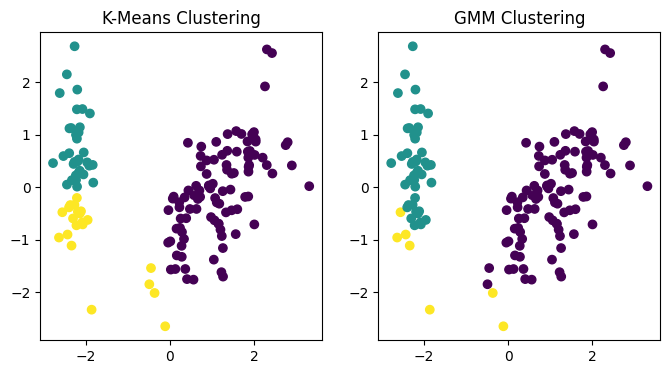

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"Silhouette Score for K-Means: {kmeans_silhouette:.4f}")
print(f"Silhouette Score for GMM: {gmm_silhouette:.4f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title("GMM Clustering")
plt.show()


8. Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Correct Predictions:")
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        print(f"  Sample {i+1}: Actual - {iris.target_names[y_test[i]]}, Predicted - {iris.target_names[y_pred[i]]}")

print("\nWrong Predictions:")
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(f"  Sample {i+1}: Actual - {iris.target_names[y_test[i]]}, Predicted - {iris.target_names[y_pred[i]]}")

Accuracy: 1.0
Correct Predictions:
  Sample 1: Actual - versicolor, Predicted - versicolor
  Sample 2: Actual - setosa, Predicted - setosa
  Sample 3: Actual - virginica, Predicted - virginica
  Sample 4: Actual - versicolor, Predicted - versicolor
  Sample 5: Actual - versicolor, Predicted - versicolor
  Sample 6: Actual - setosa, Predicted - setosa
  Sample 7: Actual - versicolor, Predicted - versicolor
  Sample 8: Actual - virginica, Predicted - virginica
  Sample 9: Actual - versicolor, Predicted - versicolor
  Sample 10: Actual - versicolor, Predicted - versicolor
  Sample 11: Actual - virginica, Predicted - virginica
  Sample 12: Actual - setosa, Predicted - setosa
  Sample 13: Actual - setosa, Predicted - setosa
  Sample 14: Actual - setosa, Predicted - setosa
  Sample 15: Actual - setosa, Predicted - setosa
  Sample 16: Actual - versicolor, Predicted - versicolor
  Sample 17: Actual - virginica, Predicted - virginica
  Sample 18: Actual - versicolor, Predicted - versicolor
  Sa

9.	Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

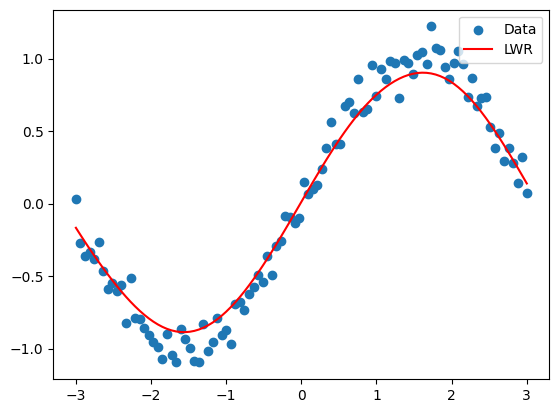

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(0, 0.1, len(X))

def kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))

def predict(X_train, y_train, x0, tau):
    weights = np.array([kernel(x0, xi, tau) for xi in X_train])
    W = np.diag(weights)
    theta = np.linalg.inv(X_train.T @ W @ X_train) @ X_train.T @ W @ y_train
    return x0 @ theta

tau = 0.5
X_poly = np.vstack([np.ones_like(X), X]).T
y_pred = np.array([predict(X_poly, y, np.array([1, x]), tau) for x in X])

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="LWR")
plt.legend()
plt.show()


10.	Implement and demonstrate the working of SVM algorithm for classification


In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


11.	Write a program to Demonstrate RANDOM FOREST using the
dataset California housing price prediction


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X, y = housing.data, housing.target
columns = housing.feature_names

df = pd.DataFrame(X, columns=columns)

print(df.head())

print("Null values:", df.isnull().sum())

df.hist(figsize=(10, 8))
plt.show()

print("Covariance:\n", df.cov())
print("Correlation:\n", df.corr())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.25350914263453594


12.	Write a program to Demonstrate the working of the KNN. Use an IRIS data set


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0
